In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting a summary of the Usa 2016 primary Results

In [2]:
usa_2016_primary = pd.read_csv('us-2016-primary-results.csv', sep = ';')

In [3]:
usa_2016_primary.head(3)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Vermont,VT,Sutton,95000197.0,Republican,John Kasich,20,0.227
1,Vermont,VT,Tunbridge,95000204.0,Republican,John Kasich,36,0.319
2,Vermont,VT,Weathersfield,95000220.0,Republican,Ted Cruz,46,0.111


In [4]:
print(usa_2016_primary.shape)
print('\n')
print(usa_2016_primary.info())

(24611, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 8 columns):
state                 24611 non-null object
state_abbreviation    24611 non-null object
county                24611 non-null object
fips                  24511 non-null float64
party                 24611 non-null object
candidate             24611 non-null object
votes                 24611 non-null int64
fraction_votes        24611 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB
None


#### Total votes casted 

In [5]:
usa_2016_primary['votes'].sum()

56759187

#### Showing the Candidates with the highest vote and their respective party

In [6]:
usa_2016_primary.groupby(['party','candidate'])['votes'].sum().sort_values(ascending=False)

party       candidate      
Democrat    Hillary Clinton    15692452
Republican  Donald Trump       13302541
Democrat    Bernie Sanders     11959102
Republican  Ted Cruz            7603006
            John Kasich         4159949
            Marco Rubio         3321076
            Ben Carson           564553
            Jeb Bush              94411
            Chris Christie        24353
            Carly Fiorina         15191
            Rand Paul              8479
Democrat    No Preference          8152
Republican  Mike Huckabee          3345
            Rick Santorum          1782
Democrat    Martin O'Malley         752
            Uncommitted              43
Name: votes, dtype: int64

Hillary Clinton had the highest vote for the Democrat Party

While Donald Trump had the highest vote for the Rupublican Party

## 1976 - 2018 senate Dataset

In [7]:
senate_1976_2018 = pd.read_csv('1976-2018-senate.csv',   encoding = 'latin1', engine='python')

In [8]:
senate_1976_2018.head(3)

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Sam Steiger,republican,False,total,321236,741210,False,20171011.0
1,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Wm. Mathews Feighan,independent,False,total,1565,741210,False,20171011.0
2,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Dennis DeConcini,democrat,False,total,400334,741210,False,20171011.0


In [9]:
senate_1976_2018.corr()

,year,state_fips,state_cen,state_ic,special,writein,candidatevotes,totalvotes,unofficial,version
year,1.000000,-0.019738,0.031506,0.037449,0.047220,0.160537,0.015116,0.109079,0.044756,0.325850
state_fips,-0.019738,1.000000,-0.188682,-0.086770,-0.022961,-0.107393,-0.042840,-0.126935,0.047933,0.056763
state_cen,0.031506,-0.188682,1.000000,0.964222,0.017334,0.008557,0.003349,-0.092189,0.002378,-0.050299
state_ic,0.037449,-0.086770,0.964222,1.000000,0.021967,0.026140,-0.001594,-0.094923,0.022164,-0.045444
special,0.047220,-0.022961,0.017334,0.021967,1.000000,0.018885,-0.004310,0.026426,-0.005298,0.018740
writein,0.160537,-0.107393,0.008557,0.026140,0.018885,1.000000,-0.198228,0.054214,-0.011218,-0.008671
candidatevotes,0.015116,-0.042840,0.003349,-0.001594,-0.004310,-0.198228,1.000000,0.435020,-0.008093,0.051232
totalvotes,0.109079,-0.126935,-0.092189,-0.094923,0.026426,0.054214,0.435020,1.000000,-0.022377,0.046287
unofficial,0.044756,0.047933,0.002378,0.022164,-0.005298,-0.011218,-0.008093,-0.022377,1.000000,0.137391
version,0.325850,0.056763,-0.050299,-0.045444,0.018740,-0.008671,0.051232,0.046287,0.137391,1.000000


In [10]:
senate_1976_2018.isna().sum()

year                0
state               0
state_po            0
state_fips          0
state_cen           0
state_ic            0
office              0
district            0
stage               0
special             0
candidate         410
party             563
writein             0
mode                0
candidatevotes      0
totalvotes          0
unofficial          0
version             1
dtype: int64

We will clear those after merging

Let us remove some unimportant columns first

In [11]:
senate_1976_2018.drop(['unofficial','version','writein','state_ic','state_cen','state_po','state_fips','district','stage',
      'mode','special',], axis = 1, inplace=True)

In [12]:
senate_1976_2018.head(3)

,year,state,office,candidate,party,candidatevotes,totalvotes
0,1976,Arizona,US Senate,Sam Steiger,republican,321236,741210
1,1976,Arizona,US Senate,Wm. Mathews Feighan,independent,1565,741210
2,1976,Arizona,US Senate,Dennis DeConcini,democrat,400334,741210


In [13]:
print('Total votes casted :',senate_1976_2018['totalvotes'].sum())
print('\n')
print('Party with highest number of votes:', senate_1976_2018.groupby('party')['totalvotes'].sum().sort_values(ascending=False).head(4))
print('\n')
print('Candidate with highest number of votes:',senate_1976_2018.groupby('candidate')['totalvotes'].sum().sort_values(ascending=False).head(4))
print('\n')
print('Candidate and the party they belonged to with the highest number of votes:',senate_1976_2018.groupby(['candidate','party'])['totalvotes'].sum().sort_values(ascending=False).head(4))

Total votes casted : 7457637049


Party with highest number of votes: party
democrat       1418886554
republican     1397697774
libertarian     785705513
independent     420397974
Name: totalvotes, dtype: int64


Candidate with highest number of votes: candidate
Other                    106315315
Charles E. Schumer        73279884
Blank Vote/Scattering     71977329
Dianne Feinstein          62153791
Name: totalvotes, dtype: int64


Candidate and the party they belonged to with the highest number of votes: candidate         party            
Dianne Feinstein  democrat             62153791
Barbara Boxer     democrat             41165063
Marsha Feinland   peace and freedom    30594931
Bill Nelson       democrat             27030216
Name: totalvotes, dtype: int64


#### Renaming the columns for uniqueness

In [14]:
# This is done so we can merge them with other datasets and prevent conflicting names that are same

In [15]:
senate_1976_2018.rename(columns={'year':'Year_sen','state':'State_sen','office':'Office_sen',
                                'candidate':'Candidate_sen','party':'Party_sen','candidatevotes':'Candidatevotes_sen',
                                'totalvotes':'Totalvotes_sen'},inplace = True)

In [16]:
senate_1976_2018.head(3)

,Year_sen,State_sen,Office_sen,Candidate_sen,Party_sen,Candidatevotes_sen,Totalvotes_sen
0,1976,Arizona,US Senate,Sam Steiger,republican,321236,741210
1,1976,Arizona,US Senate,Wm. Mathews Feighan,independent,1565,741210
2,1976,Arizona,US Senate,Dennis DeConcini,democrat,400334,741210


## 1976 - 2018 house2 Dataset

In [17]:
house2_1976_2018 = pd.read_csv('1976-2018-house2.csv', encoding = 'latin1', engine='python')

In [18]:
house2_1976_2018.head(4)

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170,False,20200424
1,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Jack Edwards,republican,False,total,98257,157170,False,20200424
2,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,NaN,NaN,True,total,7,157170,False,20200424
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362,False,20200424


In [19]:
house2_1976_2018.corr()

,year,state_fips,state_cen,state_ic,district,special,writein,candidatevotes,totalvotes,unofficial,version
year,1.000000,0.003758,0.059177,0.056059,-0.017997,0.007097,0.037493,0.123767,0.489902,0.058823,NaN
state_fips,0.003758,1.000000,-0.293808,-0.247965,-0.178549,0.069902,-0.013655,-0.047240,-0.006686,0.027009,NaN
state_cen,0.059177,-0.293808,1.000000,0.979196,0.165341,0.048508,0.003935,0.070336,-0.054568,0.006837,NaN
state_ic,0.056059,-0.247965,0.979196,1.000000,0.140105,0.030299,0.018134,0.074902,-0.040761,0.019288,NaN
district,-0.017997,-0.178549,0.165341,0.140105,1.000000,0.054117,-0.075858,-0.056703,-0.161752,-0.012466,NaN
special,0.007097,0.069902,0.048508,0.030299,0.054117,1.000000,-0.003698,-0.028716,-0.044898,-0.002003,NaN
writein,0.037493,-0.013655,0.003935,0.018134,-0.075858,-0.003698,1.000000,-0.290764,0.018592,-0.010186,NaN
candidatevotes,0.123767,-0.047240,0.070336,0.074902,-0.056703,-0.028716,-0.290764,1.000000,0.289485,0.026292,NaN
totalvotes,0.489902,-0.006686,-0.054568,-0.040761,-0.161752,-0.044898,0.018592,0.289485,1.000000,0.034089,NaN
unofficial,0.058823,0.027009,0.006837,0.019288,-0.012466,-0.002003,-0.010186,0.026292,0.034089,1.000000,NaN


In [20]:
house2_1976_2018.isna().sum()

year                 0
state                0
state_po             0
state_fips           0
state_cen            0
state_ic             0
office               0
district             0
stage               30
runoff            8656
special              0
candidate         2120
party             3422
writein              0
mode                 0
candidatevotes       0
totalvotes           0
unofficial           0
version              0
dtype: int64

In [21]:
house2_1976_2018.drop(['unofficial','version','writein','state_ic','state_cen','state_po','state_fips','district','stage',
        'mode','special','runoff',], axis = 1, inplace=True)

In [22]:
house2_1976_2018.head(3)

,year,state,office,candidate,party,candidatevotes,totalvotes
0,1976,Alabama,US House,Bill Davenport,democrat,58906,157170
1,1976,Alabama,US House,Jack Edwards,republican,98257,157170
2,1976,Alabama,US House,NaN,NaN,7,157170


#### Votes and party summary

In [23]:
print('Total votes casted :',house2_1976_2018['totalvotes'].sum())
print('\n')
print('Party with highest number of votes:', house2_1976_2018.groupby('party')['totalvotes'].sum().sort_values(ascending=False).head(4))
print('\n')
print('Candidate with highest number of votes:',house2_1976_2018.groupby('candidate')['totalvotes'].sum().sort_values(ascending=False).head(4))
print('\n')
print('Candidates and the party they belonged to with the highest number of votes:',house2_1976_2018.groupby(['candidate','party'])['totalvotes'].sum().sort_values(ascending=False).head(4))

Total votes casted : 6110684435


Party with highest number of votes: party
democrat       1819406771
republican     1813254159
libertarian     540513899
independent     232220248
Name: totalvotes, dtype: int64


Candidate with highest number of votes: candidate
Other                    96170940
Blank Vote/Scattering    82812169
scatter                  66233475
Blank Vote               18545426
Name: totalvotes, dtype: int64


Candidates and the party they belonged to with the highest number of votes: candidate         party     
Don Young         republican    4660695
Peter A. DeFazio  democrat      4467308
Edward J. Markey  democrat      4440731
David E. Price    democrat      4320412
Name: totalvotes, dtype: int64


#### Renaming the columns 

In [24]:
house2_1976_2018.rename(columns={'year':'Year_house','state':'State_house','office':'Office_house',
                                'candidate':'Candidate_house','party':'Party_house','candidatevotes':'Candidatevotes_house',
                                'totalvotes':'Totalvotes_house'},inplace = True)

In [25]:
house2_1976_2018.head(3)

,Year_house,State_house,Office_house,Candidate_house,Party_house,Candidatevotes_house,Totalvotes_house
0,1976,Alabama,US House,Bill Davenport,democrat,58906,157170
1,1976,Alabama,US House,Jack Edwards,republican,98257,157170
2,1976,Alabama,US House,NaN,NaN,7,157170


## President 1976 - 2016 Dataset

In [26]:
president_1976_2016 = pd.read_csv('president-1976-2016.csv')

In [27]:
president_1976_2016.head(4)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN


In [28]:
print(president_1976_2016.shape)
print('\n')
print(president_1976_2016.info())

(3740, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 14 columns):
year              3740 non-null int64
state             3740 non-null object
state_po          3740 non-null object
state_fips        3740 non-null int64
state_cen         3740 non-null int64
state_ic          3740 non-null int64
office            3740 non-null object
candidate         3474 non-null object
party             3404 non-null object
writein           3740 non-null bool
candidatevotes    3740 non-null int64
totalvotes        3740 non-null int64
version           3740 non-null int64
notes             0 non-null float64
dtypes: bool(1), float64(1), int64(7), object(5)
memory usage: 383.6+ KB
None


In [29]:
president_1976_2016.isna().sum()

year                 0
state                0
state_po             0
state_fips           0
state_cen            0
state_ic             0
office               0
candidate          266
party              336
writein              0
candidatevotes       0
totalvotes           0
version              0
notes             3740
dtype: int64

In [30]:
president_1976_2016.corr()

,year,state_fips,state_cen,state_ic,writein,candidatevotes,totalvotes,version,notes
year,1.000000,-0.025037,0.043511,0.042409,0.117265,0.071379,0.155448,NaN,NaN
state_fips,-0.025037,1.000000,-0.175496,-0.094987,-0.048983,-0.024058,-0.069893,NaN,NaN
state_cen,0.043511,-0.175496,1.000000,0.960689,-0.018884,-0.019645,-0.098105,NaN,NaN
state_ic,0.042409,-0.094987,0.960689,1.000000,-0.002911,-0.027458,-0.112688,NaN,NaN
writein,0.117265,-0.048983,-0.018884,-0.002911,1.000000,-0.112011,0.065309,NaN,NaN
candidatevotes,0.071379,-0.024058,-0.019645,-0.027458,-0.112011,1.000000,0.410116,NaN,NaN
totalvotes,0.155448,-0.069893,-0.098105,-0.112688,0.065309,0.410116,1.000000,NaN,NaN
version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Votes and party summary

In [31]:
print('Total votes casted :',president_1976_2016['totalvotes'].sum())
print('\n')
print('Party with highest number of votes:', president_1976_2016.groupby('party')['totalvotes'].sum().sort_values(ascending=False).head(4))
print('\n')
print('Candidate with highest number of votes:',president_1976_2016.groupby('candidate')['totalvotes'].sum().sort_values(ascending=False).head(4))
print('\n')
print('Candidates and the party they belonged to with the highest number of votes:',president_1976_2016.groupby(['candidate','party'])['totalvotes'].sum().sort_values(ascending=False).head(4))

Total votes casted : 8281421549


Party with highest number of votes: party
republican     1181400794
democrat       1178154564
libertarian    1025075851
independent     595847473
Name: totalvotes, dtype: int64


Candidate with highest number of votes: candidate
Nader, Ralph        303225773
Obama, Barack H.    275398053
Johnson, Gary       252054572
Bush, George W.     242351913
Name: totalvotes, dtype: int64


Candidates and the party they belonged to with the highest number of votes: candidate         party      
Obama, Barack H.  democrat       257622689
Johnson, Gary     libertarian    244252488
Bush, George W.   republican     227943432
Stein, Jill       green          211278492
Name: totalvotes, dtype: int64


In [32]:
president_1976_2016.groupby('year')['totalvotes'].sum() # total votes casted btw 1976 - 2016

year
1976    605944064
1980    663902096
1984    609936856
1988    537099170
1992    770486377
1996    728343795
2000    783711739
2004    768259747
2008    992684830
2012    879479158
2016    941573717
Name: totalvotes, dtype: int64

In [33]:
president_1976_2016.drop(['notes','version','writein','state_ic','state_cen','state_po','state_fips'], axis = 1, inplace=True)

#### Renaming the columns 

In [34]:
president_1976_2016.rename(columns={'year':'Year_pres','state':'State_pres','office':'Office_pres',
                                'candidate':'Candidate_pres','party':'Party_pres','candidatevotes':'Candidatevotes_pres',
                                'totalvotes':'Totalvotes_pres'},inplace = True)

In [35]:
president_1976_2016.head(3)

,Year_pres,State_pres,Office_pres,Candidate_pres,Party_pres,Candidatevotes_pres,Totalvotes_pres
0,1976,Alabama,US President,"Carter, Jimmy",democrat,659170,1182850
1,1976,Alabama,US President,"Ford, Gerald",republican,504070,1182850
2,1976,Alabama,US President,"Maddox, Lester",american independent party,9198,1182850


## Usa 2016 Presidential election by county Dataset

In [36]:
usa_Pres_elect_county = pd.read_csv('usa-2016-presidential-election-by-county.csv', sep = ';')

In [37]:
usa_Pres_elect_county.head(4)

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
0,Alaska,AK,2100,"Haines Borough, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nebraska,NE,31145,"Red Willow County, Nebraska",13.0,5061.0,1216.0,952.0,3735.0,3891.0,...,5044.0,4936.0,93.0,93.0,0.018841,0.018438,0.803428,0.754393,0.196572,0.245607
2,California,CA,6015,"Del Norte County, California",18.0,9361.0,4323.0,3791.0,4967.0,4614.0,...,9531.0,8770.0,241.0,365.0,0.041619,0.025286,0.548959,0.534661,0.451041,0.465339
3,Florida,FL,12031,"Duval County, Florida",199.0,428734.0,202618.0,196737.0,210537.0,211615.0,...,415761.0,411848.0,2606.0,3496.0,0.008489,0.006268,0.518217,0.509584,0.481783,0.490416


In [38]:
print(usa_Pres_elect_county.shape)
print('\n')
print(usa_Pres_elect_county.info())

(3143, 159)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Columns: 159 entries, State to Dem08 Frac2
dtypes: float64(147), int64(2), object(10)
memory usage: 3.8+ MB
None


In [39]:
usa_Pres_elect_county.isna().sum()

State                                  0
ST                                     1
Fips                                   0
County                                 0
Precincts                             32
Votes                                 32
Democrats 08 (Votes)                  31
Democrats 12 (Votes)                  31
Republicans 08 (Votes)                31
Republicans 12 (Votes)                31
Republicans 2016                      32
Democrats 2016                        32
Green 2016                           542
Libertarians 2016                     32
Republicans 2012                      31
Republicans 2008                      31
Democrats 2012                        31
Democrats 2008                        31
Less Than High School Diploma          0
At Least High School Diploma           0
At Least Bachelors's Degree            0
Graduate Degree                        0
School Enrollment                      0
Median Earnings 2010                   0
White (Not Latin

#### We can see lots of missing values here, using a heatmap to visualize better

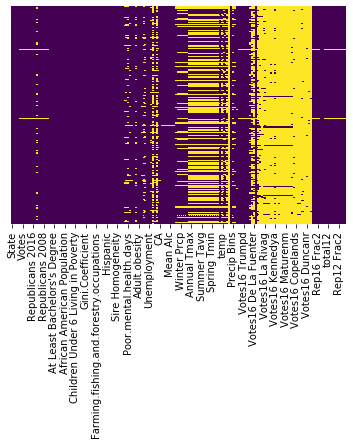

In [40]:
sns.heatmap(usa_Pres_elect_county.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [41]:
percent_missing = usa_Pres_elect_county.isnull().sum() * 100 / len(usa_Pres_elect_county)

In [42]:
missing_value = pd.DataFrame({'column_name': usa_Pres_elect_county.columns,
                                 'percent_missing': percent_missing})

In [43]:
missing_value.sort_values('percent_missing', inplace=True, ascending = False)
missing_value.head()

,column_name,percent_missing
Lat Bins,Lat Bins,100.000000
Votes16 None Of These Candidates,Votes16 None Of These Candidates,99.459115
Votes16 Giordanir,Votes16 Giordanir,99.077315
Votes16 Copelands,Votes16 Copelands,98.600064
Votes16 Skewesp,Votes16 Skewesp,98.536430


we will have to drop alot of those missing values first before we begin

In [44]:
import cufflinks as cf
cf.go_offline()


usa_Pres_elect_county['County'].dropna().iplot(kind='bar')

In [45]:
usa_Pres_elect_county.dropna(axis=1,thresh=0.7*len(usa_Pres_elect_county), inplace=True) # using thresh function


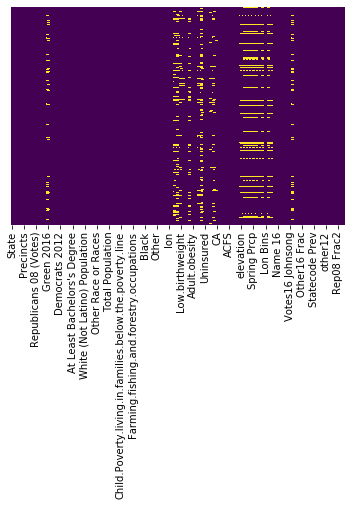

In [46]:
sns.heatmap(usa_Pres_elect_county.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

We will fix the missing data later when merging

#### Some analysis of the data

In [47]:
usa_Pres_elect_county['Total Population'].sum() #total population 

305102745

In [48]:
usa_Pres_elect_county.Votes.sum() # total votes casted in all states

129931473.0

In [49]:
usa_Pres_elect_county[['Democrats 2016', 'Republicans 2016']].sum() # total votes by party

Democrats 2016       98554.258934
Republicans 2016    197886.525539
dtype: float64

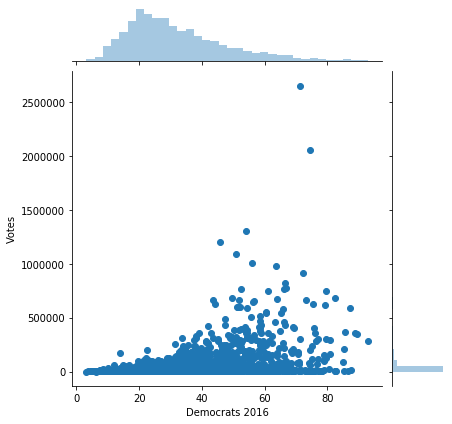

In [50]:
sns.jointplot(data = usa_Pres_elect_county, x = 'Democrats 2016', y = 'Votes')

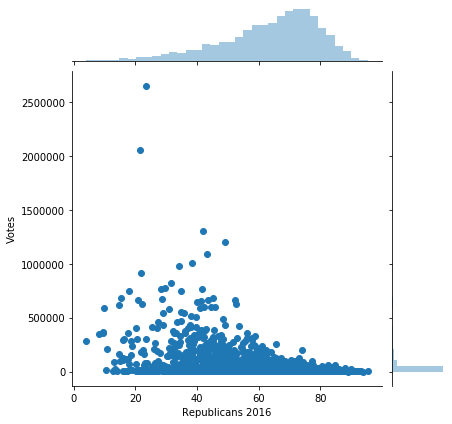

In [51]:
sns.jointplot(data = usa_Pres_elect_county, x = 'Republicans 2016', y = 'Votes')

In [52]:
usa_Pres_elect_county.groupby('Votes')['County'].value_counts().sort_values(ascending = False).head()

Votes      County                           
2652072.0  Los Angeles County, California       1
6423.0     Yell County, Arkansas                1
6599.0     Lancaster County, Virginia           1
6595.0     Perquimans County, North Carolina    1
6594.0     Colusa County, California            1
Name: County, dtype: int64

In [53]:
usa_Pres_elect_county.head(1)

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
0,Alaska,AK,2100,"Haines Borough, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
usa_Pres_elect_county.columns

Index(['State', 'ST', 'Fips', 'County', 'Precincts', 'Votes',
       'Democrats 08 (Votes)', 'Democrats 12 (Votes)',
       'Republicans 08 (Votes)', 'Republicans 12 (Votes)',
       ...
       'total08', 'total12', 'other08', 'other12', 'Other12 Frac',
       'Other08 Frac', 'Rep12 Frac2', 'Rep08 Frac2', 'Dem12 Frac2',
       'Dem08 Frac2'],
      dtype='object', length=111)

We have about 100+ columns and we need to drop alot of them because they don't have any significance to the result

In [55]:
usa_Pres_elect_county.drop(usa_Pres_elect_county.columns.to_series()["Less Than High School Diploma":"Dem08 Frac2"]
                           , axis=1, inplace=True)

In [56]:
usa_Pres_elect_county.drop(['ST','Fips'], axis = 1,inplace = True)

In [57]:
usa_Pres_elect_county

,State,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,Libertarians 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008
0,Alaska,"Haines Borough, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nebraska,"Red Willow County, Nebraska",13.0,5061.0,1216.0,952.0,3735.0,3891.0,83.224659,12.606204,0.513732,3.655404,78.829011,74.048374,19.286872,24.107851
2,California,"Del Norte County, California",18.0,9361.0,4323.0,3791.0,4967.0,4614.0,54.844568,37.228929,2.617242,4.443970,52.611174,52.114154,43.226910,45.357255
3,Florida,"Duval County, Florida",199.0,428734.0,202618.0,196737.0,210537.0,211615.0,48.995648,47.494950,0.670346,2.591817,51.381820,50.638949,47.769323,48.734249
4,Kansas,"Ellsworth County, Kansas",25.0,2626.0,851.0,702.0,2021.0,1930.0,73.610053,19.611577,2.779893,3.998477,71.165192,68.788291,25.884956,28.965283
5,Kentucky,"Cumberland County, Kentucky",10.0,3066.0,697.0,599.0,2056.0,2216.0,81.604697,14.970646,0.358774,2.185258,77.645410,73.507329,20.988087,24.919557
6,Michigan,"Presque Isle County, Michigan",17.0,7215.0,3722.0,3192.0,3606.0,3794.0,62.176022,33.264033,0.693001,3.284823,53.587571,48.047968,45.084746,49.593604
7,Missouri,"Webster County, Missouri",13.0,16690.0,5685.0,4409.0,10431.0,10708.0,76.866387,19.011384,0.509287,3.079688,69.401776,63.774762,28.576058,34.757887
8,Illinois,"Hamilton County, Illinois",16.0,4143.0,1796.0,1269.0,2353.0,2566.0,77.359401,19.309679,0.579290,2.751629,65.110378,55.182927,32.199949,42.120075
9,Illinois,"Monroe County, Illinois",37.0,19074.0,7953.0,6215.0,9881.0,10888.0,66.131907,28.950404,1.048548,3.869141,62.459844,54.642482,35.652822,43.980534


We might need some of these labels for prediction/analysis, reason why I left them here for now

## MERGING OF ALL THE DATASETS

In [58]:
house2_1976_2018.head(1)

,Year_house,State_house,Office_house,Candidate_house,Party_house,Candidatevotes_house,Totalvotes_house
0,1976,Alabama,US House,Bill Davenport,democrat,58906,157170


In [59]:
senate_1976_2018.head(1)

,Year_sen,State_sen,Office_sen,Candidate_sen,Party_sen,Candidatevotes_sen,Totalvotes_sen
0,1976,Arizona,US Senate,Sam Steiger,republican,321236,741210


In [60]:
president_1976_2016.head(1)

,Year_pres,State_pres,Office_pres,Candidate_pres,Party_pres,Candidatevotes_pres,Totalvotes_pres
0,1976,Alabama,US President,"Carter, Jimmy",democrat,659170,1182850


In [61]:
usa_Pres_elect_county.head(1)

,State,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,Libertarians 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008
0,Alaska,"Haines Borough, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### merging the datasets

In [62]:
concat_data = pd.concat([house2_1976_2018, senate_1976_2018, president_1976_2016, usa_Pres_elect_county], axis=1)

In [63]:
concat_data

,Year_house,State_house,Office_house,Candidate_house,Party_house,Candidatevotes_house,Totalvotes_house,Year_sen,State_sen,Office_sen,...,Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,Libertarians 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008
0,1976,Alabama,US House,Bill Davenport,democrat,58906,157170,1976.0,Arizona,US Senate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1976,Alabama,US House,Jack Edwards,republican,98257,157170,1976.0,Arizona,US Senate,...,3735.0,3891.0,83.224659,12.606204,0.513732,3.655404,78.829011,74.048374,19.286872,24.107851
2,1976,Alabama,US House,NaN,NaN,7,157170,1976.0,Arizona,US Senate,...,4967.0,4614.0,54.844568,37.228929,2.617242,4.443970,52.611174,52.114154,43.226910,45.357255
3,1976,Alabama,US House,J. Carole Keahey,democrat,66288,156362,1976.0,Arizona,US Senate,...,210537.0,211615.0,48.995648,47.494950,0.670346,2.591817,51.381820,50.638949,47.769323,48.734249
4,1976,Alabama,US House,NaN,NaN,5,156362,1976.0,Arizona,US Senate,...,2021.0,1930.0,73.610053,19.611577,2.779893,3.998477,71.165192,68.788291,25.884956,28.965283
5,1976,Alabama,US House,"William L. """"Bill"""" Dickinson",republican,90069,156362,1976.0,California,US Senate,...,2056.0,2216.0,81.604697,14.970646,0.358774,2.185258,77.645410,73.507329,20.988087,24.919557
6,1976,Alabama,US House,Bill Nichols,democrat,106935,108048,1976.0,California,US Senate,...,3606.0,3794.0,62.176022,33.264033,0.693001,3.284823,53.587571,48.047968,45.084746,49.593604
7,1976,Alabama,US House,NaN,NaN,2,108048,1976.0,California,US Senate,...,10431.0,10708.0,76.866387,19.011384,0.509287,3.079688,69.401776,63.774762,28.576058,34.757887
8,1976,Alabama,US House,Ogburn Gardner,prohibition,1111,108048,1976.0,California,US Senate,...,2353.0,2566.0,77.359401,19.309679,0.579290,2.751629,65.110378,55.182927,32.199949,42.120075
9,1976,Alabama,US House,Tom Bevill,democrat,141490,176022,1976.0,California,US Senate,...,9881.0,10888.0,66.131907,28.950404,1.048548,3.869141,62.459844,54.642482,35.652822,43.980534


In [64]:
concat_data.shape

(29636, 37)

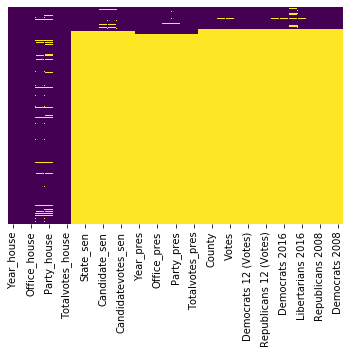

In [65]:
sns.heatmap(concat_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

We can see alot of misssing values as a result of the merging/concating done

Please I would appreciate your thoughts on this, on what to do..

If there is a way we can reduce such NAN values, because I feel dropping them will remove some important columns that 
will contrubute to the overall result..

Or perhaps a better way of combining the datasets..